In [1]:
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# pull in the target data
target = np.genfromtxt('targets/2C_discharge.csv', delimiter=',')
# scale the time so that [0..100] ends at 1800s
targettime = np.linspace(0,1800,num=100)
targetdata = np.interp(targettime,target[:,0], target[:,1])
# re-format the data so that it can be plugged into the recurrent model
le=5
fit_x = np.zeros((100-le,le))
for i in range(100-le):
    fit_x[i,:] = targetdata[i:i+le]

In [2]:
# load in the model:
gb = joblib.load('GBM_Model_py3.pkl')

RMSE: gbm 0.026741521498


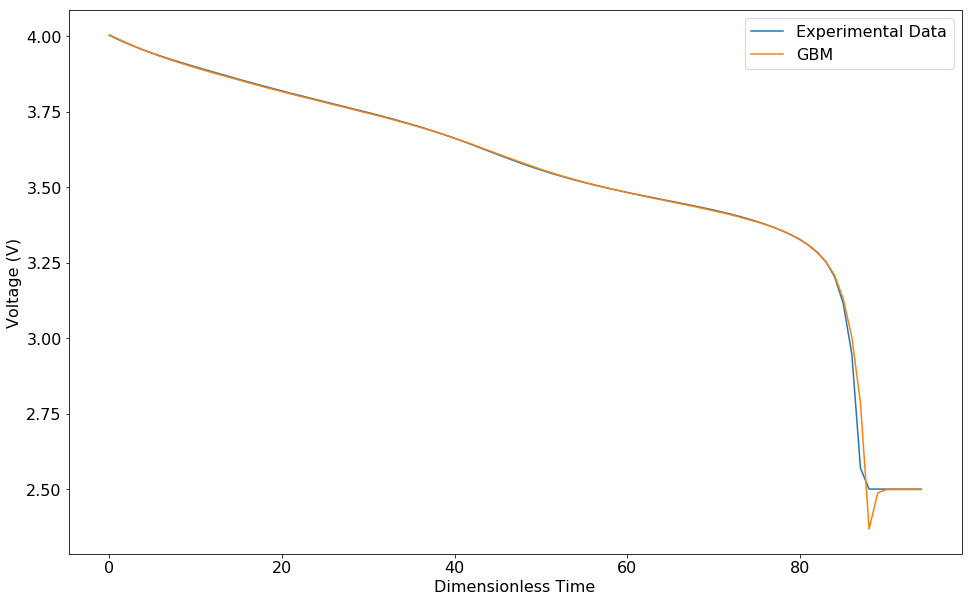

In [3]:
# to plot the data, first predict the output
to_plot = gb.predict(fit_x)

# then, create the figure and plot the data.
fig = plt.figure(figsize = (16,10))
plt.plot(targetdata[5:], label = 'Experimental Data')
plt.plot(to_plot[:], label = 'GBM')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Dimensionless Time", fontsize=16)
plt.ylabel("Voltage (V)", fontsize=16)
plt.legend(fontsize=16)
print('RMSE: gbm', np.sqrt(((to_plot[:]-targetdata[5:])**2).mean()))